# Week 10 handin

## 01 Assignment
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## 02 Status
Alle punkter er lavet/afprøvet

## 03 Solution part 1

In [1]:
%matplotlib notebook
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
label_enc =preprocessing.LabelEncoder()
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle

In [2]:
data = '../data/iris_data.csv'
df = pd.read_csv(data, decimal=',')
df.drop(['Petal length', 'Petal width'], inplace =True, axis=1)
df['Species'].unique().tolist()
print(df)

     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]


<IPython.core.display.Javascript object>


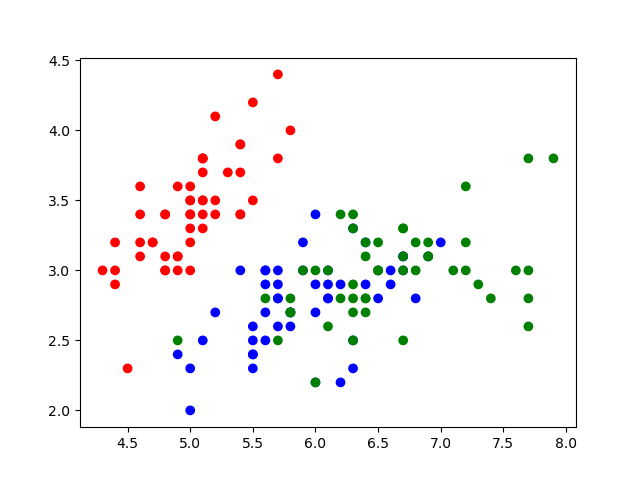

In [3]:
x,y,z = df['Sepal length'], df['Sepal width'], df['Species']
df['Species'] = label_enc.fit_transform(df['Species'].astype(str))

colormap = np.array(['r','b','g'])
plt.scatter(x,y, c=colormap[df['Species']])

In [4]:
def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)
    print('bandwidth er: ',bandwidth)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    
    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

ms = mean_shift(df)
print(ms)

bandwidth er:  0.756221250514
Number of estimated clusters : 4
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), array([[4.95227273, 3.37727273, 0.        ],
       [5.9       , 2.775     , 1.        ],
       [6.49714286, 3.        , 2.        ],
       [4.9       , 2.5       , 2.        ]]), 4)


bandwidth er:  0.5782805830511768
Number of estimated clusters : 3


<IPython.core.display.Javascript object>


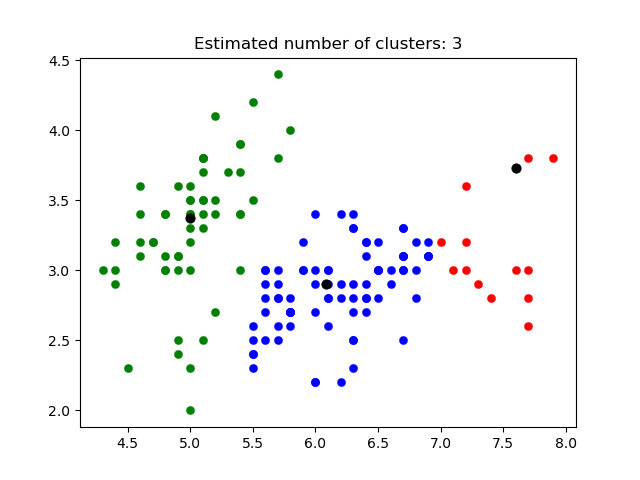

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [5]:
labels, cluster_centers, n_clusters = mean_shift(df.drop('Species',axis=1))

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)

    cluster_center = cluster_centers[k]

    x = df[labels == k]['Sepal length']
    y = df[labels == k]['Sepal width']

    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))